In [1]:
# import required modules
from breastshot_calcs import *
from undershot_calcs import *
from user_interface import *
from river_class import *
from payback import *

# TURBINE MODELLING, POSITION OPTIMISATION, POWER AND COST PREDICTION

This notebook will take a customer through the step by step process of assessing the installation of a PicoStream turbine at their location.

### Section 1: begins with an input of estimated river, household and turbine features


In [2]:
# Input river details

# width in meters
width = 1.2

# depth in meters
depth = 0.7

# velocity in m/s
velocity = 1.5

# initialise river object
river = river_obj(width, depth, velocity, head = 2)

In [3]:
# initialise default PicoStream breastshot turbine object with river object as input
b_turbine = breastTurbine(river=river)

In [4]:
# initialise default household object (either small, medium or large or numeric value)
house = household('small')

### Section 2. sensitivity analysis



In [5]:
x,y,RPM = 1, -0.1, 20

turbine = breastTurbine(river, x_centre=x, y_centre=y, RPM=RPM)
turbine.analysis(x, y, RPM)

1127.2047599029488

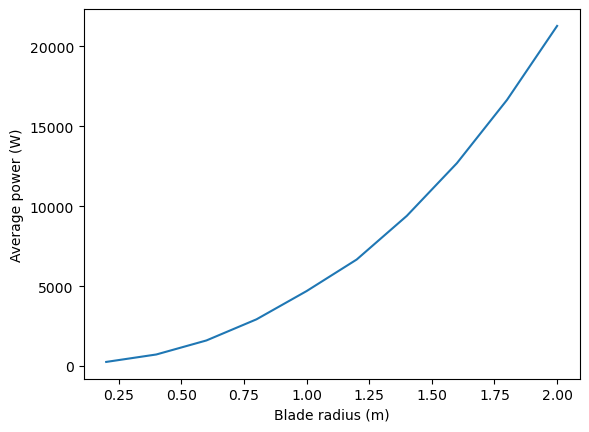

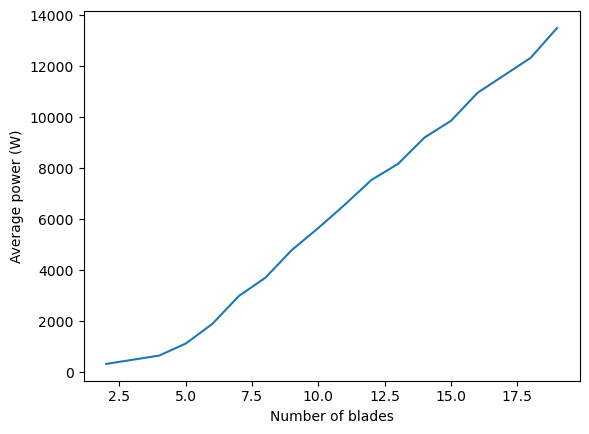

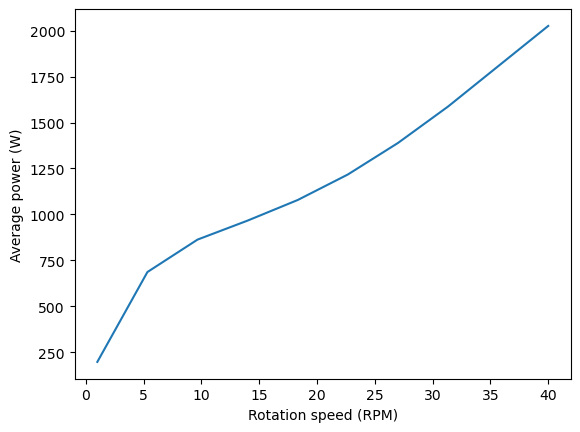

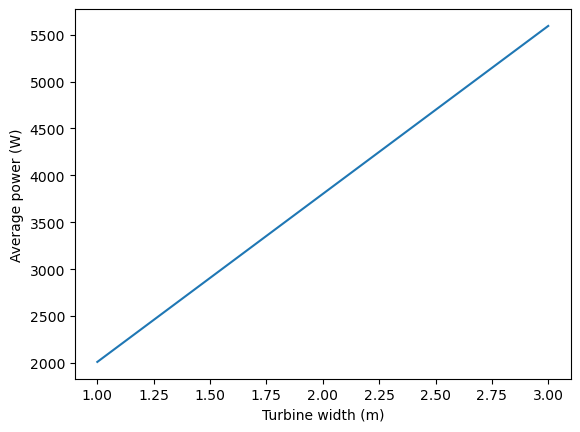

No intersection found
error: turbine not in river
No intersection found
error: turbine not in river
No intersection found
error: turbine not in river
No intersection found
error: turbine not in river


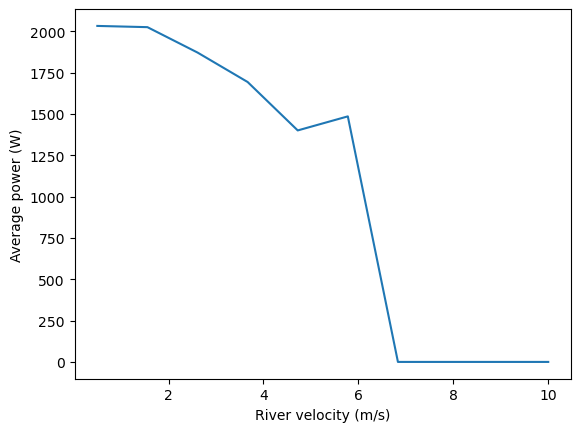

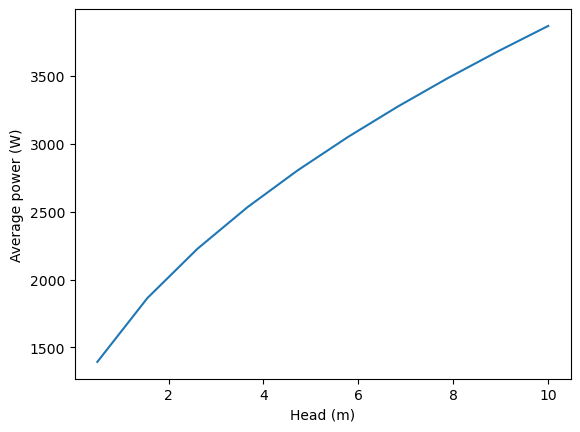

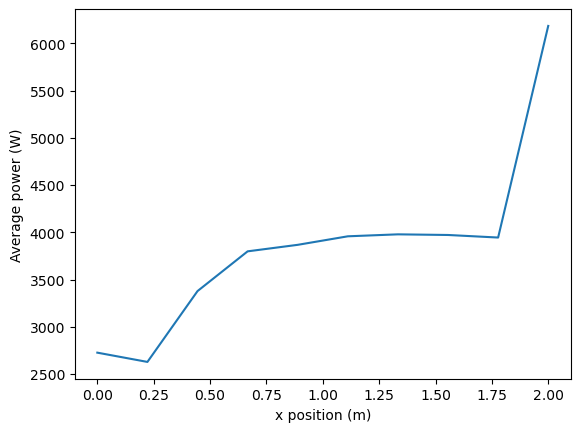

No intersection found
error: turbine not in river
No intersection found
error: turbine not in river
No intersection found
error: turbine not in river
No intersection found
error: turbine not in river
No intersection found
error: turbine not in river


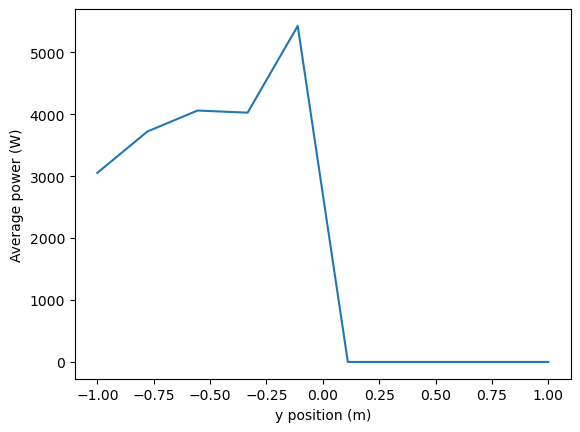

In [6]:
# Blade radius
radii = np.linspace(0.2, 2, 10)

rad_avgs = []
for r in radii:
    turbine = breastTurbine(river, x_centre=x, y_centre=y, RPM=RPM, radius=r)
    rad_avgs.append(turbine.analysis(x, y, RPM))
    
plt.figure()
plt.plot(radii, rad_avgs)
plt.xlabel('Blade radius (m)')
plt.ylabel('Average power (W)')
plt.show()

# Number of blades
blades =  range(2,20)

blade_avgs = []

for b in blades:
    turbine = breastTurbine(river, x_centre=x, y_centre=y, RPM=RPM, num_blades=b)
    blade_avgs.append(turbine.analysis(x, y, RPM))

plt.figure()
plt.plot(blades, blade_avgs)
plt.xlabel('Number of blades')
plt.ylabel('Average power (W)')
plt.show()

# Rotation speed in RPM
RPMs = np.linspace(1, 40, 10)

RPM_avgs = []
for RPM in RPMs:
    turbine = breastTurbine(river, x_centre=x, y_centre=y, RPM=RPM)
    RPM_avgs.append(turbine.analysis(x, y, RPM))

plt.figure()
plt.plot(RPMs, RPM_avgs)
plt.xlabel('Rotation speed (RPM)')
plt.ylabel('Average power (W)')
plt.show()

# Turbine width
widths = np.linspace(1, 3, 5)

width_avgs = []
for w in widths:
    turbine = breastTurbine(river, x_centre=x, y_centre=y, RPM=RPM, width=w)
    width_avgs.append(turbine.analysis(x, y, RPM))

plt.figure()
plt.plot(widths, width_avgs)
plt.xlabel('Turbine width (m)')
plt.ylabel('Average power (W)')
plt.show()

# flow rate
# river velocity
vels = np.linspace(0.5, 10, 10)

vel_avgs = []
for v in vels:
    river = river_obj(width, depth, v, head = 2)
    turbine = breastTurbine(river, x_centre=x, y_centre=y, RPM=RPM)
    vel_avgs.append(turbine.analysis(x, y, RPM))

plt.figure()
plt.plot(vels, vel_avgs)
plt.xlabel('River velocity (m/s)')
plt.ylabel('Average power (W)')
plt.show()

# head
heads = np.linspace(0.5, 10, 10)

head_avgs = []
for h in heads:
    river = river_obj(width, depth, velocity, head = h)
    turbine = breastTurbine(river, x_centre=x, y_centre=y, RPM=RPM)
    head_avgs.append(turbine.analysis(x, y, RPM))

plt.figure()
plt.plot(heads, head_avgs)
plt.xlabel('Head (m)')
plt.ylabel('Average power (W)')
plt.show()

# position of turbine
xs = np.linspace(0, 2, 10)
ys = np.linspace(-1, 1, 10)

# vary x
x_avgs = []
for x in xs:
    turbine = breastTurbine(river, x_centre=x, y_centre=y, RPM=RPM)
    x_avgs.append(turbine.analysis(x, y, RPM))

plt.figure()
plt.plot(xs, x_avgs)
plt.xlabel('x position (m)')
plt.ylabel('Average power (W)')
plt.show()

# vary y
y_avgs = []
for y in ys:
    turbine = breastTurbine(river, x_centre=x, y_centre=y, RPM=RPM)
    y_avgs.append(turbine.analysis(x, y, RPM))

plt.figure()
plt.plot(ys, y_avgs)
plt.xlabel('y position (m)')
plt.ylabel('Average power (W)')
plt.show()






### Section 3. the payback and business calculations